# Getting started with DATA

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('data/titanic/train.csv')

In [54]:
# 1. how big is the data?
df.shape

(891, 12)

In [55]:
# 2. how does the data look like?
# df.head()
df.sample(5) #for random rows to get a better view of the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.3500,NaN,Q
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,NaN,S


In [56]:
# 3. what is the datatype of the columns?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
# 4. Are there any missing values?
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [58]:
# 5. how does the data look like mathematically?
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [59]:
# 6. Are there any duplicate values?
df.duplicated().sum() 
# if present then drop those rows with duplicated values using drop duplicate in pandas

np.int64(0)

In [60]:
# 7. are the data columns correlated?
numeric_columns = [col for col in df.columns if df[col].dtype != 'object']
df_numeric = df[numeric_columns]
df_numeric

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


This is karl pearson's correlation coefficient:
* Ranging from -1 to 1
* 1 means perfect negative correlation
* 0 means no correlation|
* -1 means perfect positive correlation

In [61]:
df_numeric.corr() # for whole numerical columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [62]:
df_numeric.corr()['Survived'] #for particular column

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

# Univariate Analysis
- It means analyzing a single variable.
- Common techniques include:
  - Descriptive statistics (mean, median, mode)
  - Visualization (histograms, box plots)


There are two types of variables:
1. Categorical Variables - represent categories or groups (e.g., gender, color,(can be numbers but not continuous))
2. Numerical Variables - represent measurable quantities (e.g., age, income, temperature)

## 1. Categorical Data

### Countplot

<Axes: xlabel='Survived', ylabel='count'>

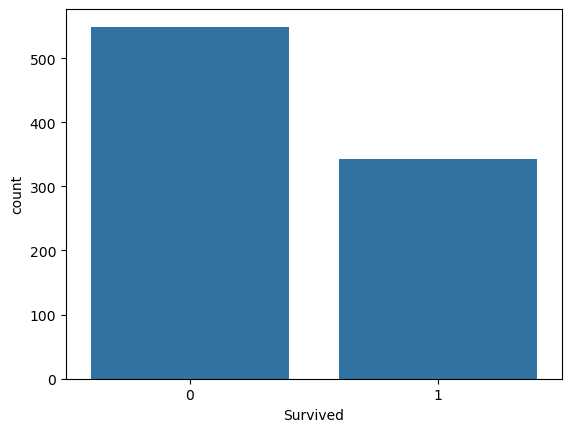

In [63]:
sns.countplot(x='Survived', data=df)

<Axes: xlabel='Pclass', ylabel='count'>

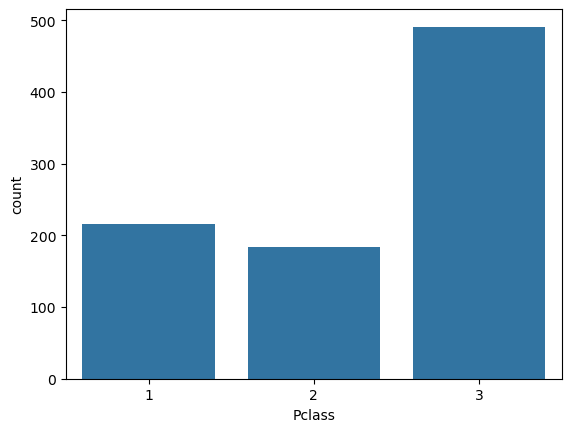

In [64]:
sns.countplot(x='Pclass',data=df)

<Axes: xlabel='SibSp', ylabel='count'>

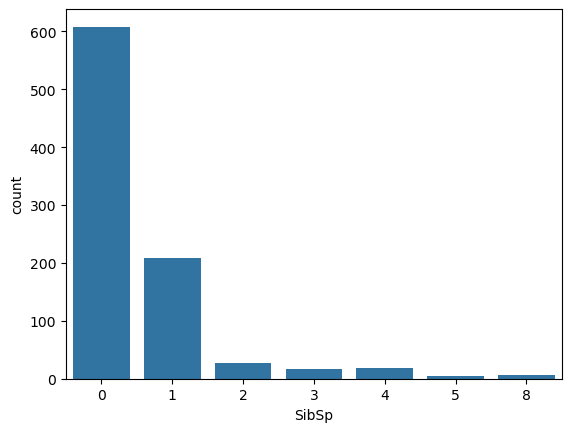

In [65]:
sns.countplot(x='SibSp',data=df)

### 2. Pie chart

<Axes: ylabel='count'>

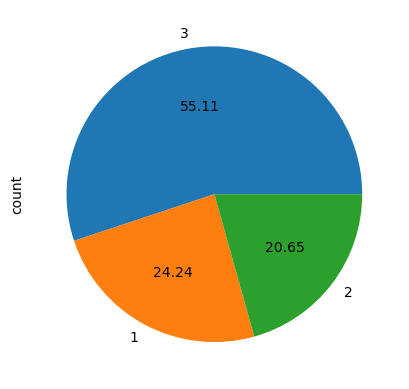

In [66]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%.2f') # change 'kind' for different plots, autopct for displaying percentage

## 2. Numerical Data

### a. histogram

(array([337., 182., 147.,  50.,  16.,  39.,  18.,  29.,  18.,   2.,   8.,
          7.,   0.,   7.,   9.,   0.,   2.,   0.,   0.,   0.,   4.,   1.,
          4.,   0.,   2.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.      ,  10.246584,  20.493168,  30.739752,  40.986336,
         51.23292 ,  61.479504,  71.726088,  81.972672,  92.219256,
        102.46584 , 112.712424, 122.959008, 133.205592, 143.452176,
        153.69876 , 163.945344, 174.191928, 184.438512, 194.685096,
        204.93168 , 215.178264, 225.424848, 235.671432, 245.918016,
        256.1646  , 266.411184, 276.657768, 286.904352, 297.150936,
        307.39752 , 317.644104, 327.890688, 338.137272, 348.383856,
        358.63044 , 368.877024, 379.123608, 389.370192, 399.616776,
        409.86336 , 420.109944, 430.356528, 440.603112, 450.849696,
        461.09628 , 471.342864, 481.589448, 49

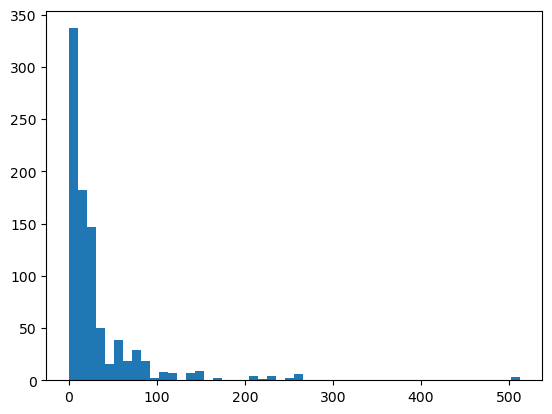

In [67]:
plt.hist(df['Fare'],bins=50)


### b. distplot

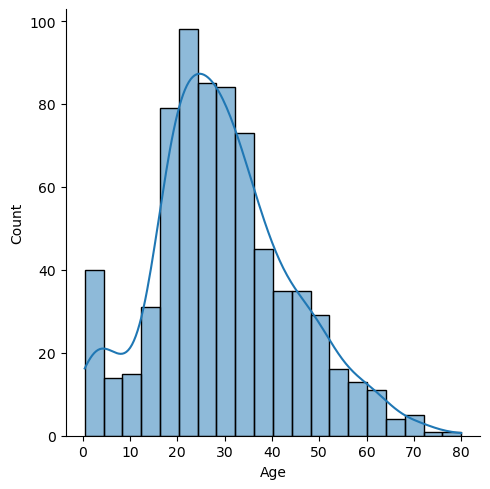

In [68]:
sns.displot(df['Age'],kde=True)  # sns.distplot is deprecated so sns.displot with kde=True

### c. boxplot



<Axes: ylabel='Age'>

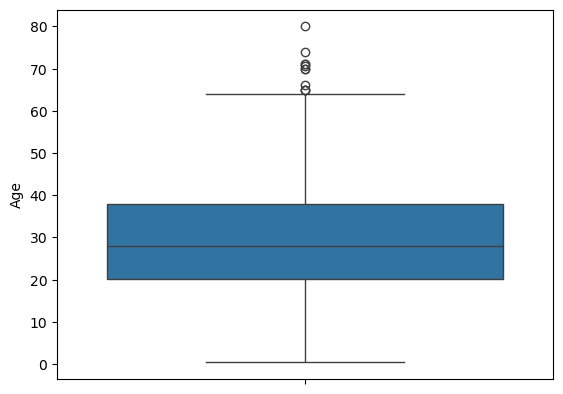

In [ ]:
sns.boxplot(y='Age',data=df) #change x,y axis for horizontal and vertical plot respectively.

<Axes: xlabel='Pclass', ylabel='Age'>

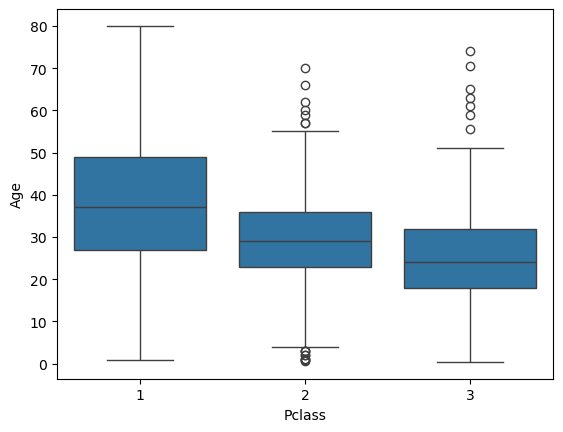

In [77]:
# for plotting numerical column with categorical column
sns.boxplot(x='Pclass',y='Age',data=df) #x as categorical, y as numerical

<Axes: xlabel='Survived', ylabel='Fare'>

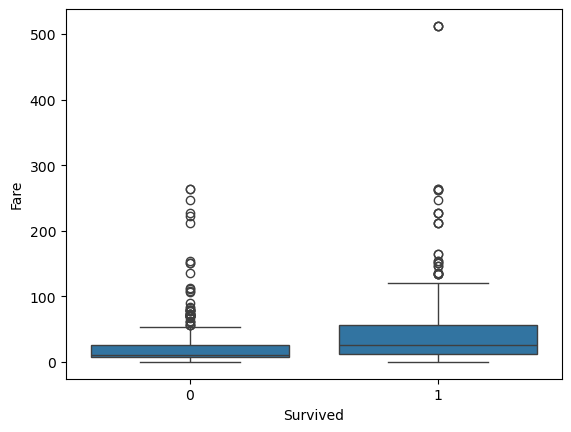

In [79]:
sns.boxplot(x='Survived',y='Fare',data=df) 

In [ ]:
# Skewness check. 
# 1 means positively skewed(right), 0 means symmetrical, -1 means negatively skewed(left)
df['Age'].skew() 

np.float64(0.38910778230082704)